<a href="https://colab.research.google.com/github/PradeC123/Data-Structure-and-Algorithms-Specialization-UCSD/blob/main/AbortionOpinionUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Unzipping the uploaded file to see the contents
import zipfile
import os

zip_path = '/content/Abortion Opinion.zip'
unzip_dir = '/content/Abortion Opinion/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Listing the files inside the unzipped directory
os.listdir(unzip_dir)


['gss_abortion.csv']

In [7]:
# Reading the CSV file into a pandas DataFrame
file_path = os.path.join(unzip_dir, 'gss_abortion.csv')
abortion_data = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame to get an overview of the data
abortion_data.head()

,Unnamed: 0,id,year,age,race,sex,hispaniccat,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic
0,1,1,1972,23.0,White,Female,NaN,16.0,"Ind,Near Dem",NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN
1,2,2,1972,70.0,White,Male,NaN,10.0,Not Str Democrat,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN
2,3,3,1972,48.0,White,Female,NaN,12.0,Independent,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN
3,4,4,1972,27.0,White,Female,NaN,17.0,Not Str Democrat,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN
4,5,5,1972,61.0,White,Female,NaN,12.0,Strong Democrat,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN


In [8]:
abortion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   64814 non-null  int64  
 1   id           64814 non-null  int64  
 2   year         64814 non-null  int64  
 3   age          64586 non-null  float64
 4   race         64814 non-null  object 
 5   sex          64814 non-null  object 
 6   hispaniccat  26650 non-null  float64
 7   educ         64637 non-null  float64
 8   partyid      64396 non-null  object 
 9   relactiv     19233 non-null  float64
 10  abany        36794 non-null  float64
 11  abdefect     44152 non-null  float64
 12  abnomore     44072 non-null  float64
 13  abhlth       44360 non-null  float64
 14  abpoor       44023 non-null  float64
 15  abrape       43922 non-null  float64
 16  absingle     44020 non-null  float64
 17  pid          63324 non-null  float64
 18  hispanic     26650 non-null  float64
dtypes: f

1. Remove columns: Unnamed: 0, and hispaniccat.
2. Split the dataset: Into people who gave an opinion and those who didn't (based on NA values in the abortion opinion columns).
3. Create a new column: abany, setting it to 1 if all of the abortion opinion columns are 1, and 0 otherwise.
4. Explore the partyid column: Check for N/A values and replace with 7 if needed.
Replace N/A values: In abortion opinion columns with -1 (considered as "Sensitive unanswered question").

In [9]:
# Step 1: Remove columns: Unnamed: 0, and hispaniccat.
abortion_data.drop(['Unnamed: 0', 'id', 'hispaniccat'], axis=1, inplace=True)


  Step 2: The numerical column age and the education: add another column age_cat = {Young, Middle Age, Senior} Label dataset. add another column Education_cat = {Low Education, Medium Education, High School Education, College Graduates, Post Graduates} label in the dataset. add age_encoder column and add educ_cat_encoder that stores the one hot encoded data.

In [10]:
# Step 2: Add Age Category Column
abortion_data["age_cat"] = pd.cut(abortion_data['age'], bins = [0, 35, 60, np.inf],
                                  labels = ['Young', 'Middle Age', 'Senior'])

Step 3: Another column Education_cat = {Low Education, Medium Education, High School Education, College Graduates, Post Graduates} label in the dataset.

In [11]:
# Step 3: Add Education Category Column
abortion_data['educ_cat'] = pd.cut(abortion_data['educ'], bins = [0, 8, 11, 12, 16, np.inf],
                                   labels = ['Primary School Educatiion', 'Secondary School Education',
                                             'High School Education', 'College Graduate',
                                             'Post Graduate'])

Step 4: Add age_encoder column and add educ_cat_encoder that stores the one hot encoded data.

In [12]:
# Step 4: Add Label Encoder to Education and Age Category
age_cat_mapping = {'Young':0 , 'Middle Age': 1, 'Senior': 2}
educ_cat_mapping = {'Primary School Educatiion': 0 , 'Secondary School Education': 1,
                                             'High School Education':2, 'College Graduate':3,
                                             'Post Graduate': 4}
abortion_data['age_cat_map'] = abortion_data['age_cat'].map(age_cat_mapping, na_action='ignore')
abortion_data['educ_cat_map'] = abortion_data['educ_cat'].map(educ_cat_mapping, na_action='ignore')


Split the dataset into people who gave an opinion and people who didn't gave any opinion.
People who didn't give any opinion have all the abortion attribute have NA in the column.



In [13]:
# Split the dataset into people who gave an opinion and people who didn't gave any opinion.
# People who didn't give any opinion have all the abortion attribute have NA in the column.
abortion_columns = ['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']

no_opinion_log = abortion_data[abortion_columns].isna().all(axis = 1)
no_opinion_people = abortion_data[no_opinion_log]
opinion_people = abortion_data[~no_opinion_log]

In [14]:
opinion_people

,year,age,race,sex,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic,age_cat,educ_cat,age_cat_map,educ_cat_map
0,1972,23.0,White,Female,16.0,"Ind,Near Dem",NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,Young,College Graduate,0,3
1,1972,70.0,White,Male,10.0,Not Str Democrat,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,Senior,Secondary School Education,2,1
2,1972,48.0,White,Female,12.0,Independent,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,Middle Age,High School Education,1,2
3,1972,27.0,White,Female,17.0,Not Str Democrat,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Young,Post Graduate,0,4
4,1972,61.0,White,Female,12.0,Strong Democrat,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,Senior,High School Education,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64808,2018,19.0,White,Male,12.0,Not Str Republican,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,Young,High School Education,0,2
64809,2018,37.0,White,Female,12.0,Independent,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,Middle Age,High School Education,1,2
64810,2018,75.0,White,Female,12.0,Not Str Republican,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,Senior,High School Education,2,2
64811,2018,67.0,White,Female,12.0,Independent,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,Senior,High School Education,2,2


Explored the partyid column, but found no N/A values to replace with 7.
Replaced N/A values in abortion opinion columns with -1 (considered as "Sensitive unanswered question").

In [15]:
# Step 5: Converting all the opinions into int datatype and changing N/A option (Sensetive) to -1
columns_int = ['abdefect',	'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle','pid']

opinion_people[columns_int] = opinion_people[columns_int].fillna(-1)
opinion_people[columns_int] = opinion_people[columns_int].astype(int)


opinion_people.head()

<ipython-input-15-a7dca2b53348>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_people[columns_int] = opinion_people[columns_int].fillna(-1)
<ipython-input-15-a7dca2b53348>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_people[columns_int] = opinion_people[columns_int].astype(int)


,year,age,race,sex,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic,age_cat,educ_cat,age_cat_map,educ_cat_map
0,1972,23.0,White,Female,16.0,"Ind,Near Dem",NaN,NaN,1,1,1,1,1,1,2,NaN,Young,College Graduate,0,3
1,1972,70.0,White,Male,10.0,Not Str Democrat,NaN,NaN,1,0,1,0,1,1,1,NaN,Senior,Secondary School Education,2,1
2,1972,48.0,White,Female,12.0,Independent,NaN,NaN,1,1,1,1,1,1,3,NaN,Middle Age,High School Education,1,2
3,1972,27.0,White,Female,17.0,Not Str Democrat,NaN,NaN,0,0,1,1,1,1,1,NaN,Young,Post Graduate,0,4
4,1972,61.0,White,Female,12.0,Strong Democrat,NaN,NaN,1,1,1,1,1,1,0,NaN,Senior,High School Education,2,2


change the column abany, setting it to 1 if all of the abortion opinion columns were 1, and 0 otherwise.

In [16]:
# List of abortion opinion columns
abortion_opinion_columns = ['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']

# Updating the "abany" column based on the condition that all abortion opinion columns are 1
opinion_people['abany'] = (opinion_people[abortion_opinion_columns].sum(axis=1) == len(abortion_opinion_columns)).astype(int)

# Displaying the first few rows to confirm the update
opinion_people.head()


<ipython-input-16-2531e0c48782>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_people['abany'] = (opinion_people[abortion_opinion_columns].sum(axis=1) == len(abortion_opinion_columns)).astype(int)


,year,age,race,sex,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic,age_cat,educ_cat,age_cat_map,educ_cat_map
0,1972,23.0,White,Female,16.0,"Ind,Near Dem",NaN,1,1,1,1,1,1,1,2,NaN,Young,College Graduate,0,3
1,1972,70.0,White,Male,10.0,Not Str Democrat,NaN,0,1,0,1,0,1,1,1,NaN,Senior,Secondary School Education,2,1
2,1972,48.0,White,Female,12.0,Independent,NaN,1,1,1,1,1,1,1,3,NaN,Middle Age,High School Education,1,2
3,1972,27.0,White,Female,17.0,Not Str Democrat,NaN,0,0,0,1,1,1,1,1,NaN,Young,Post Graduate,0,4
4,1972,61.0,White,Female,12.0,Strong Democrat,NaN,1,1,1,1,1,1,1,0,NaN,Senior,High School Education,2,2


In [17]:
# Step 6: Saving the preprocessing stage
# File paths for saving the DataFrames
gave_opinion_path = '/content/gave_opinion.csv'
no_opinion_path = '/content/no_opinion.csv'

# Saving the updated "gave_opinion" DataFrame to CSV
opinion_people.to_csv(gave_opinion_path, index=False)

# Saving the updated "no_opinion" DataFrame to CSV
no_opinion_people.to_csv(no_opinion_path, index=False)

gave_opinion_path, no_opinion_path

('/content/gave_opinion.csv', '/content/no_opinion.csv')

# Time Series Analysis

change the column abany, setting it to 1 if all of the abortion opinion columns were 1, and 0 otherwise.

# Time Series Analysis Year = 1972

In [18]:
opinion_people_1972 = opinion_people[opinion_people['year'] == 1972]

opinion_people_1972.head()

,year,age,race,sex,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic,age_cat,educ_cat,age_cat_map,educ_cat_map
0,1972,23.0,White,Female,16.0,"Ind,Near Dem",NaN,1,1,1,1,1,1,1,2,NaN,Young,College Graduate,0,3
1,1972,70.0,White,Male,10.0,Not Str Democrat,NaN,0,1,0,1,0,1,1,1,NaN,Senior,Secondary School Education,2,1
2,1972,48.0,White,Female,12.0,Independent,NaN,1,1,1,1,1,1,1,3,NaN,Middle Age,High School Education,1,2
3,1972,27.0,White,Female,17.0,Not Str Democrat,NaN,0,0,0,1,1,1,1,1,NaN,Young,Post Graduate,0,4
4,1972,61.0,White,Female,12.0,Strong Democrat,NaN,1,1,1,1,1,1,1,0,NaN,Senior,High School Education,2,2


Missing Data Analysis

In [19]:
opinion_people_1972.isnull().mean()*100

year              0.000000
age               0.250313
race              0.000000
sex               0.000000
educ              0.250313
partyid           0.312891
relactiv        100.000000
abany             0.000000
abdefect          0.000000
abnomore          0.000000
abhlth            0.000000
abpoor            0.000000
abrape            0.000000
absingle          0.000000
pid               0.000000
hispanic        100.000000
age_cat           0.250313
educ_cat          1.063830
age_cat_map       0.250313
educ_cat_map      1.063830
dtype: float64

Drop the 100% missing values.

In [20]:
opinion_people_1972.drop(columns= ['relactiv', 'hispanic'], inplace = True)

<ipython-input-20-be51d633b98e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_people_1972.drop(columns= ['relactiv', 'hispanic'], inplace = True)


In [21]:
# Since the percentage of the missing data is low (Lets drop the missing values)
opinion_people_1972 = opinion_people_1972.dropna()

# Visualization of 1972 Abortion data

In [22]:
opinion_people_1972

,year,age,race,sex,educ,partyid,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,age_cat,educ_cat,age_cat_map,educ_cat_map
0,1972,23.0,White,Female,16.0,"Ind,Near Dem",1,1,1,1,1,1,1,2,Young,College Graduate,0,3
1,1972,70.0,White,Male,10.0,Not Str Democrat,0,1,0,1,0,1,1,1,Senior,Secondary School Education,2,1
2,1972,48.0,White,Female,12.0,Independent,1,1,1,1,1,1,1,3,Middle Age,High School Education,1,2
3,1972,27.0,White,Female,17.0,Not Str Democrat,0,0,0,1,1,1,1,1,Young,Post Graduate,0,4
4,1972,61.0,White,Female,12.0,Strong Democrat,1,1,1,1,1,1,1,0,Senior,High School Education,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1972,20.0,White,Female,13.0,"Ind,Near Dem",1,1,1,1,1,1,1,2,Young,College Graduate,0,3
1608,1972,69.0,White,Female,10.0,Not Str Democrat,0,1,-1,1,-1,1,-1,1,Senior,Secondary School Education,2,1
1609,1972,74.0,White,Female,7.0,"Ind,Near Dem",0,0,0,0,0,0,0,2,Senior,Primary School Educatiion,2,0
1611,1972,22.0,White,Male,14.0,"Ind,Near Dem",1,1,1,1,1,1,1,2,Young,College Graduate,0,3


In [23]:
opinion_people_1972['race'].value_counts()

White    1327
Black     242
Other       4
Name: race, dtype: int64

Text(0.5, 1.0, 'Distribution of Age in 1972')

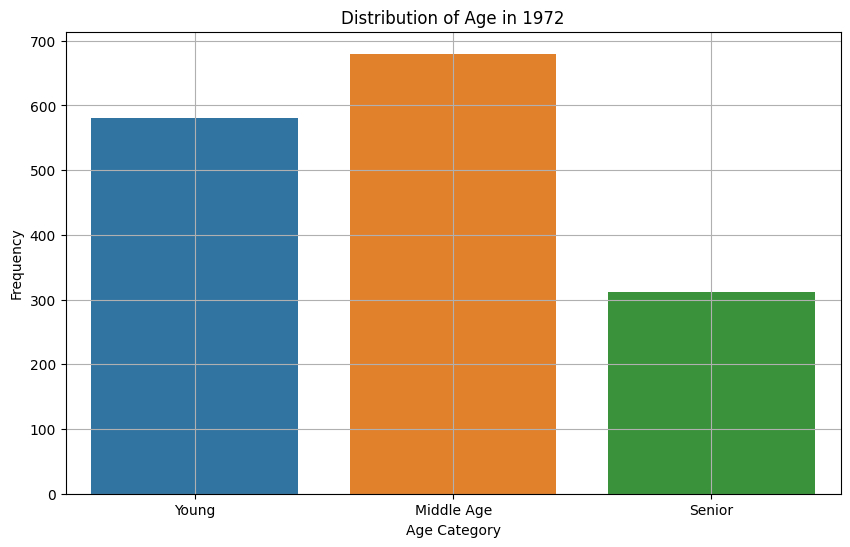

In [24]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['age_cat'])
plt.xlabel("Age Category")
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Age in 1972")

Text(0.5, 1.0, 'Distribution of Education Category in 1972')

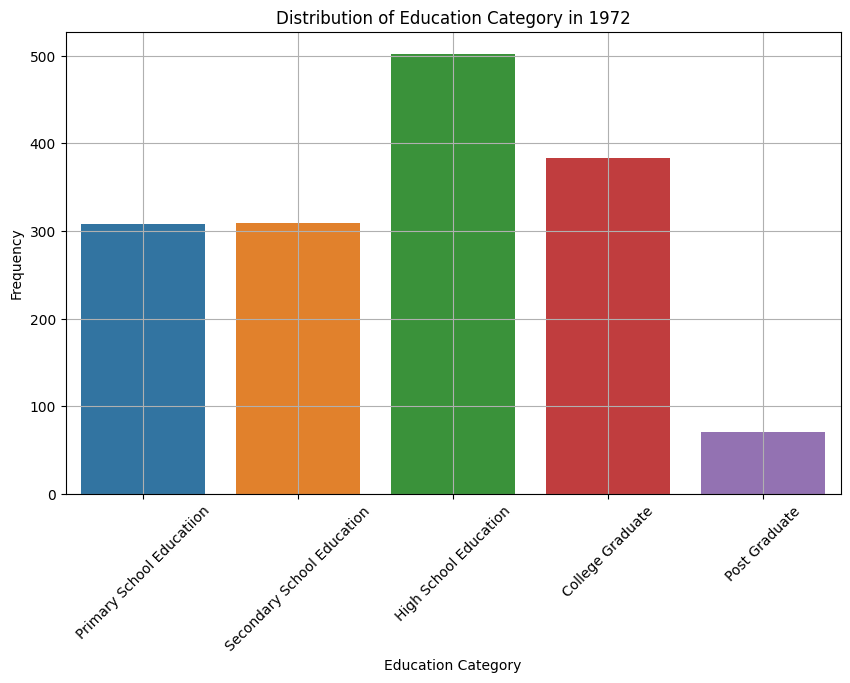

In [25]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['educ_cat'])
plt.xlabel("Education Category")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Education Category in 1972")

Text(0.5, 1.0, 'Distribution of Sex in 1972')

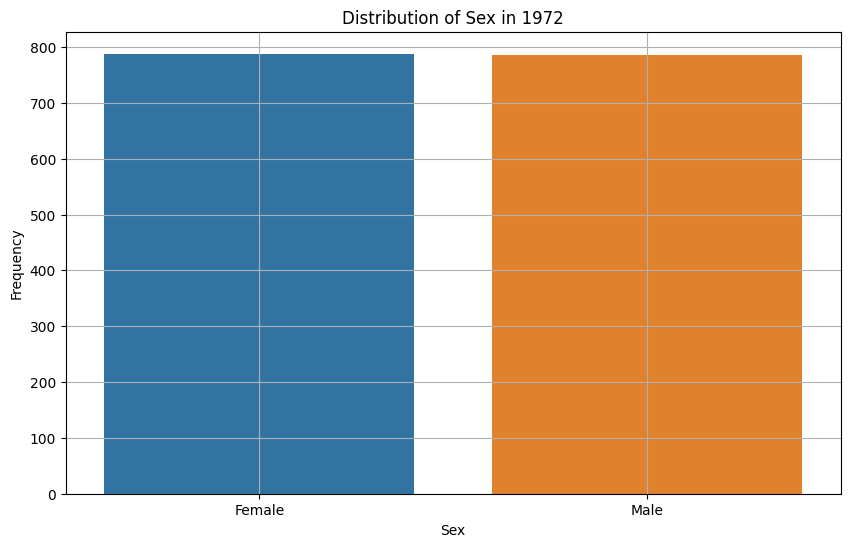

In [26]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['sex'])
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Sex in 1972")

Text(0.5, 1.0, 'Distribution of Party Identification in 1972')

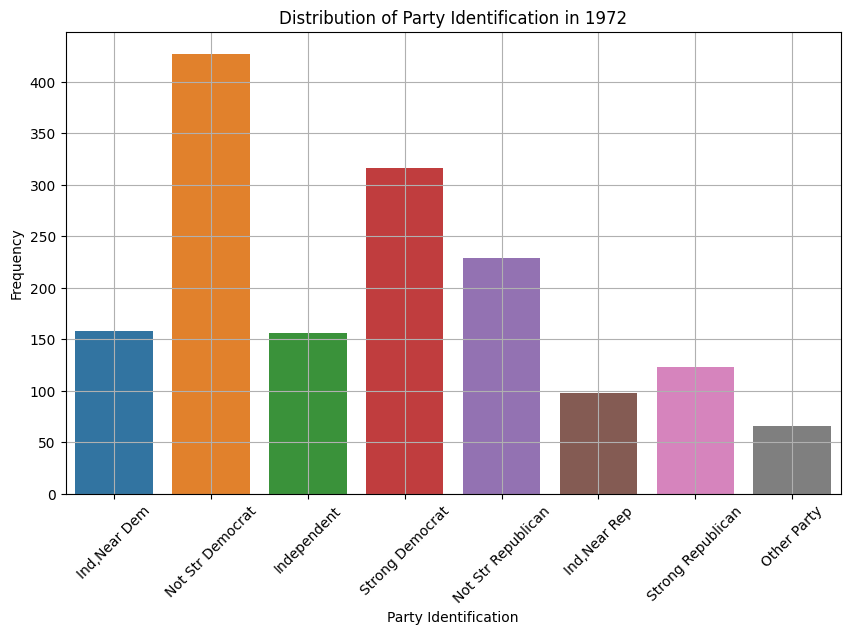

In [27]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['partyid'])
plt.xlabel("Party Identification")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Party Identification in 1972")

Text(0.5, 1.0, 'Opinion: Should abortion be legalized in all the cases(1972)? ')

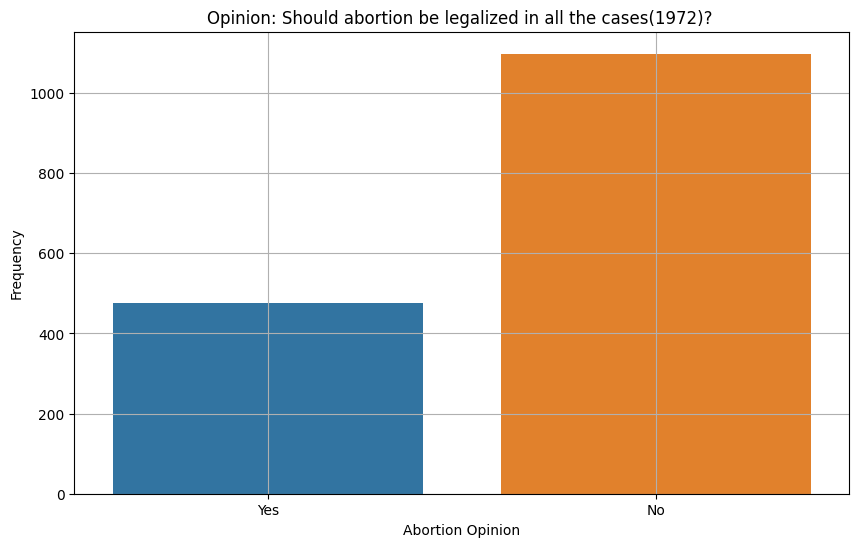

In [28]:
abany_op = {1:'Yes', 0:'No'}
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abany'].map(abany_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legalized in all the cases(1972)? ")

Text(0.5, 1.0, 'Opinion: Should abortion be legal for birth defects(1972)? ')

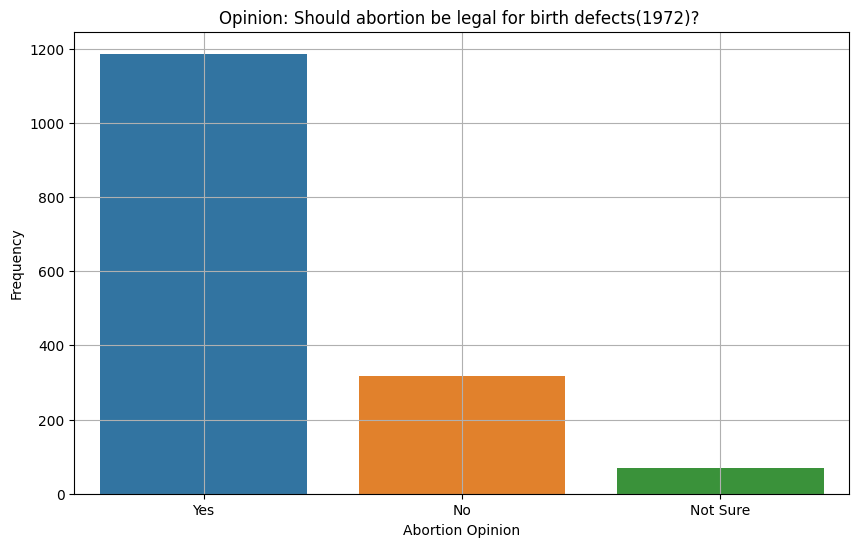

In [29]:
ab_op = {1:'Yes', 0:'No', -1: 'Not Sure'}
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abdefect'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal for birth defects(1972)? ")

Text(0.5, 1.0, 'Opinion: Should abortion be legal for woman is pregnant but wants no more children(1972)? ')

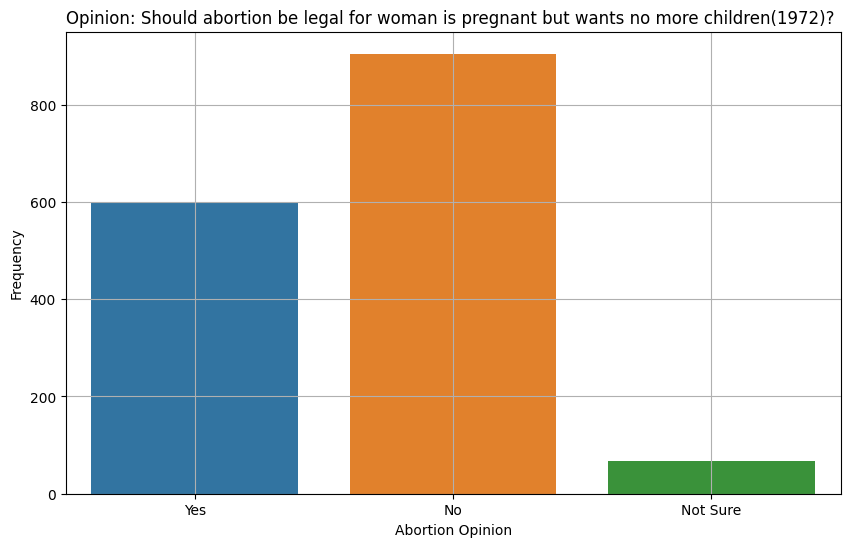

In [30]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abnomore'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal for woman is pregnant but wants no more children(1972)? ")

Text(0.5, 1.0, "Opinion: Should abortion be legal if a pregnant woman's health is in danger(1972)? ")

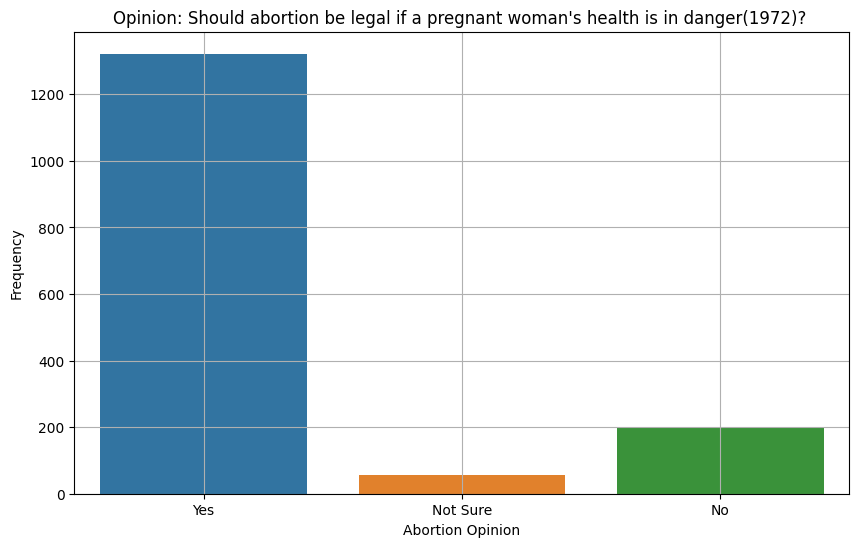

In [31]:
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abhlth'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal if a pregnant woman's health is in danger(1972)? ")

Text(0.5, 1.0, 'Opinion: Should abortion be legal if a pregnant woman is poor and cannot afford more children.(1972)? ')

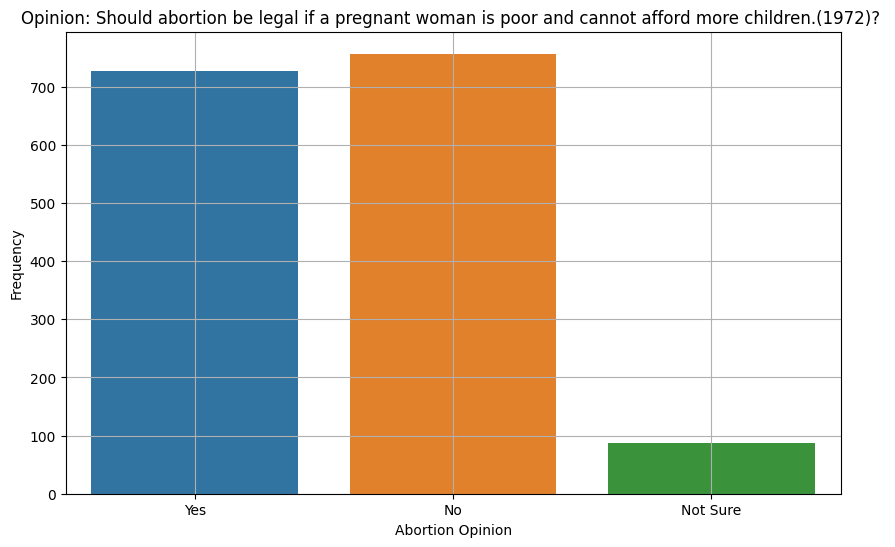

In [32]:
ab_op = {1:'Yes', 0:'No', -1: 'Not Sure'}
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abpoor'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal if a pregnant woman is poor and cannot afford more children.(1972)? ")

Text(0.5, 1.0, 'Opinion: Should abortion be legal if the woman became pregnant because of a rape.(1972)? ')

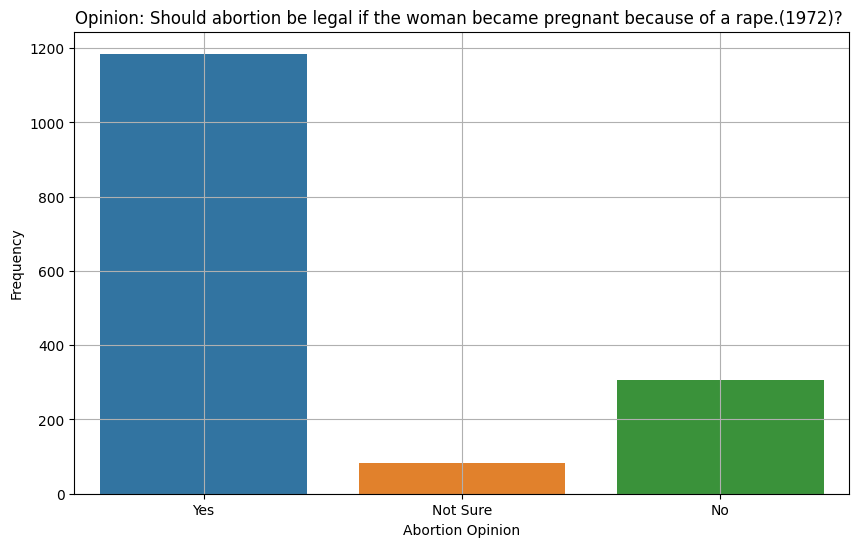

In [33]:
ab_op = {1:'Yes', 0:'No', -1: 'Not Sure'}
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['abrape'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal if the woman became pregnant because of a rape.(1972)? ")

Text(0.5, 1.0, 'Opinion: Should abortion be legal if a pregnant woman is single and does not want to marry the man who impregnated her.(1972)? ')

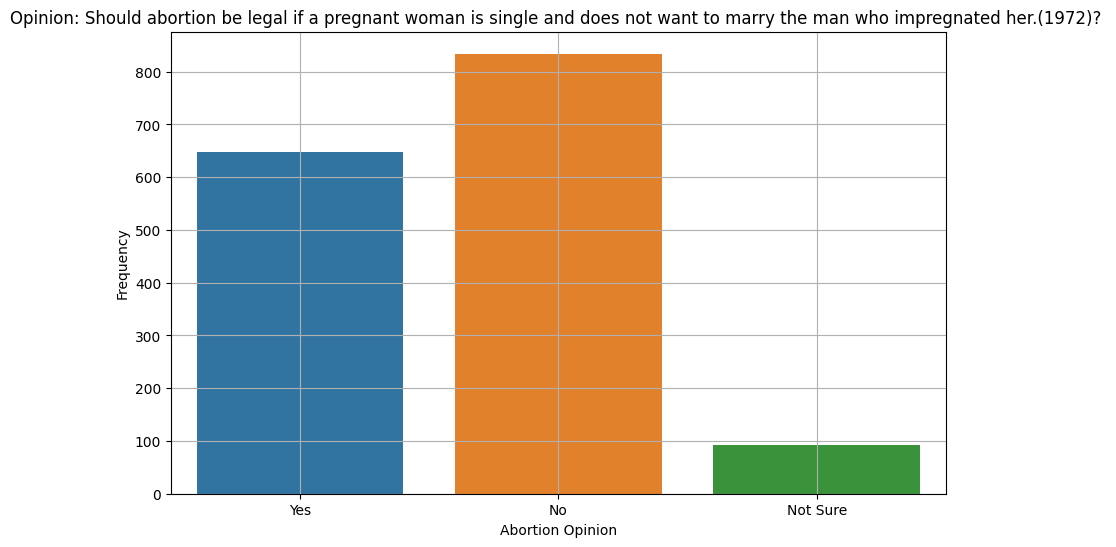

In [34]:
ab_op = {1:'Yes', 0:'No', -1: 'Not Sure'}
plt.figure(figsize = (10, 6))
sns.countplot(x = opinion_people_1972['absingle'].map(ab_op))
plt.xlabel("Abortion Opinion")
plt.ylabel("Frequency")
plt.grid()
plt.title("Opinion: Should abortion be legal if a pregnant woman is single and does not want to marry the man who impregnated her.(1972)? ")

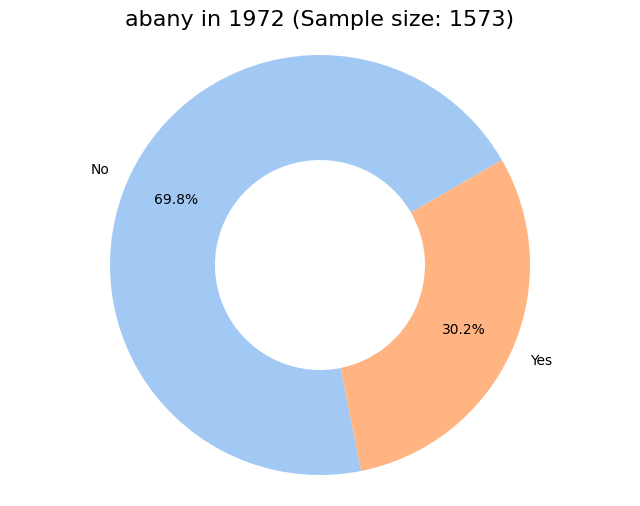

In [35]:
# Function to format the autopct and center the labels
def autopct_center(pct, allvals):
  absolute = int(pct/100.*np.sum(allvals))
  return "{:.1f}%".format(pct, absolute)

# Function to plot abortion opinion as a donut chart with specific properties
def plot_abortion_opinion_donut(data, year, column, colors):
    # Filtering data for the given year
    year_data = data[data['year'] == year]

    # Applying the mapping to the given column
    year_data[column] = year_data[column].map(ab_op)

    # Counting the frequency of each opinion
    opinion_counts = year_data[column].value_counts(normalize=True) * 100

    # Plotting the donut chart with the specified properties
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(opinion_counts,
           labels=opinion_counts.index,
           startangle=30,
           wedgeprops=dict(width=.5), # For donuts
           colors=colors,
           autopct='%1.1f%%',
           pctdistance=0.75,# Adding percentage
           textprops={'color':'black'})
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Displaying the sample size
    ax.set_title(f'{column} in {year} (Sample size: {len(year_data)})', fontsize=16, color='black')
    plt.show()

# Defining colors from Seaborn's pastel color palette
colors_pastel = sns.color_palette('pastel')

# Plotting the "abany" column for the year 1972 as a donut chart
plot_abortion_opinion_donut(opinion_people_1972, 1972, 'abany', colors_pastel)


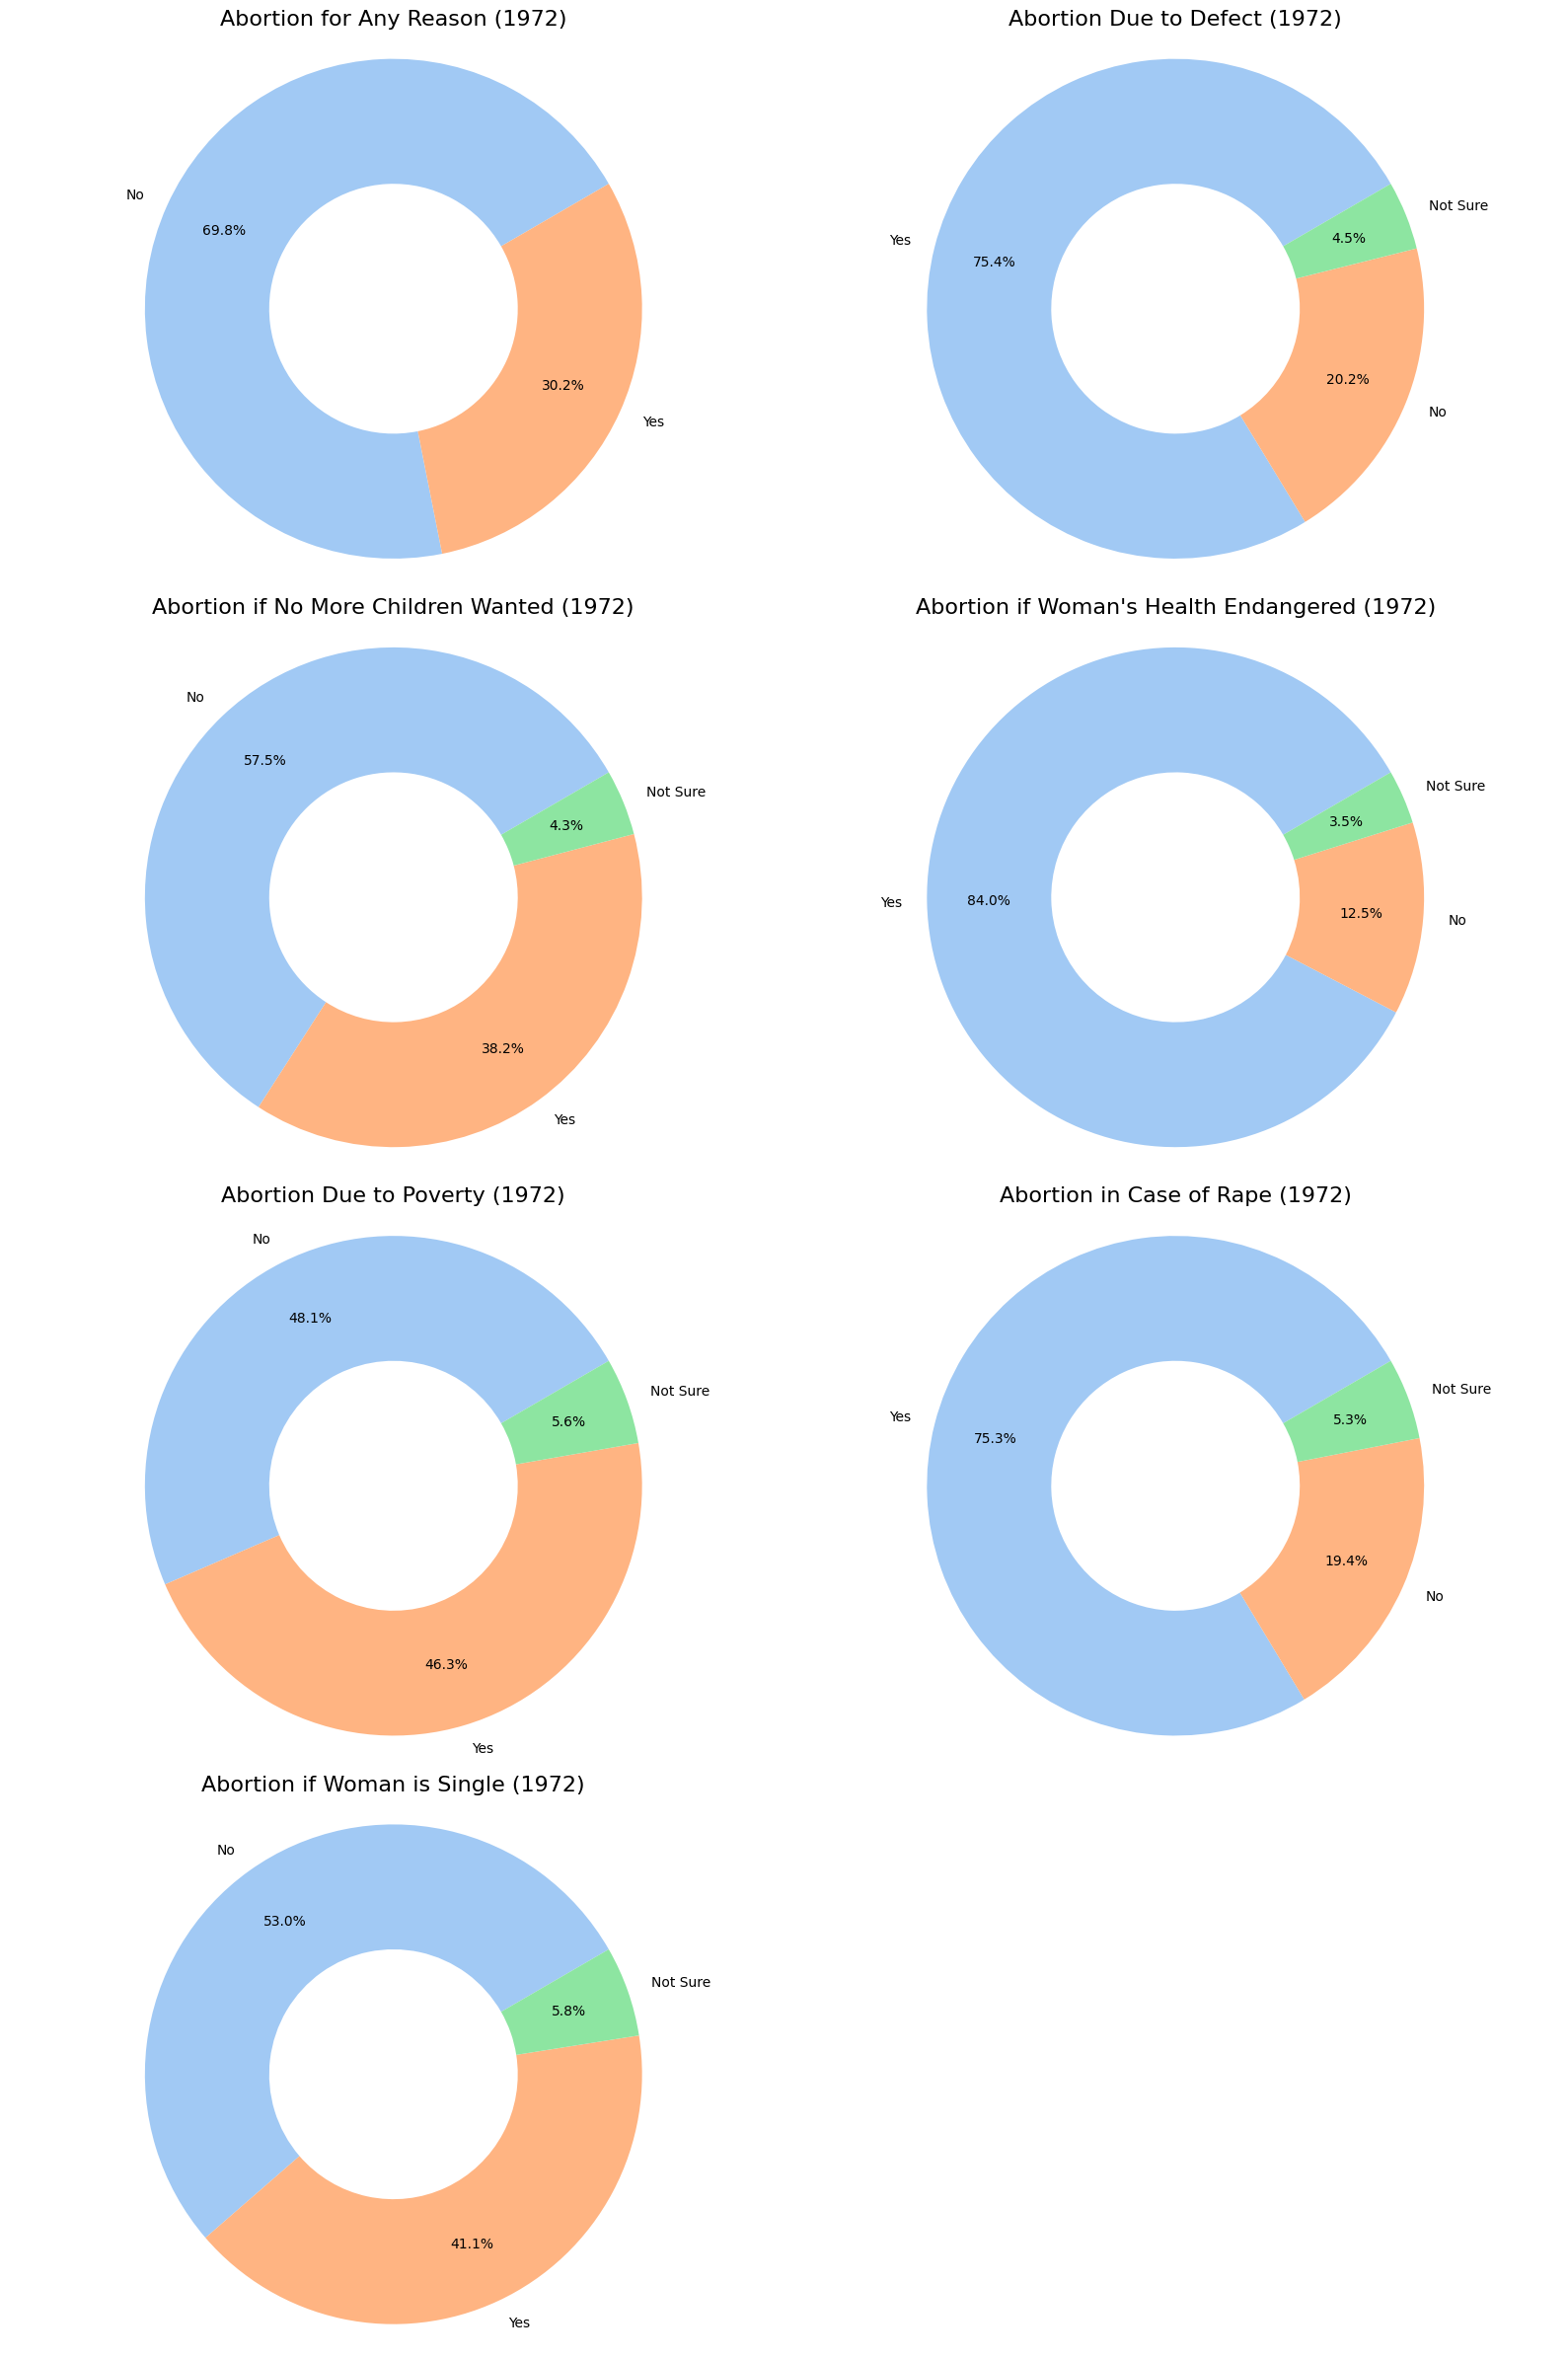

In [39]:
# Defining the mapping of column names to descriptive titles
column_titles = {
    'abany': 'Abortion for Any Reason',
    'abdefect': 'Abortion Due to Defect',
    'abnomore': 'Abortion if No More Children Wanted',
    'abhlth': "Abortion if Woman's Health Endangered",
    'abpoor': 'Abortion Due to Poverty',
    'abrape': 'Abortion in Case of Rape',
    'absingle': 'Abortion if Woman is Single'
}

# Plotting the abortion opinion subplots for the year 1972 using the given column titles
plot_abortion_opinion_subplots(opinion_people_1972, 1972, column_titles, colors_pastel)


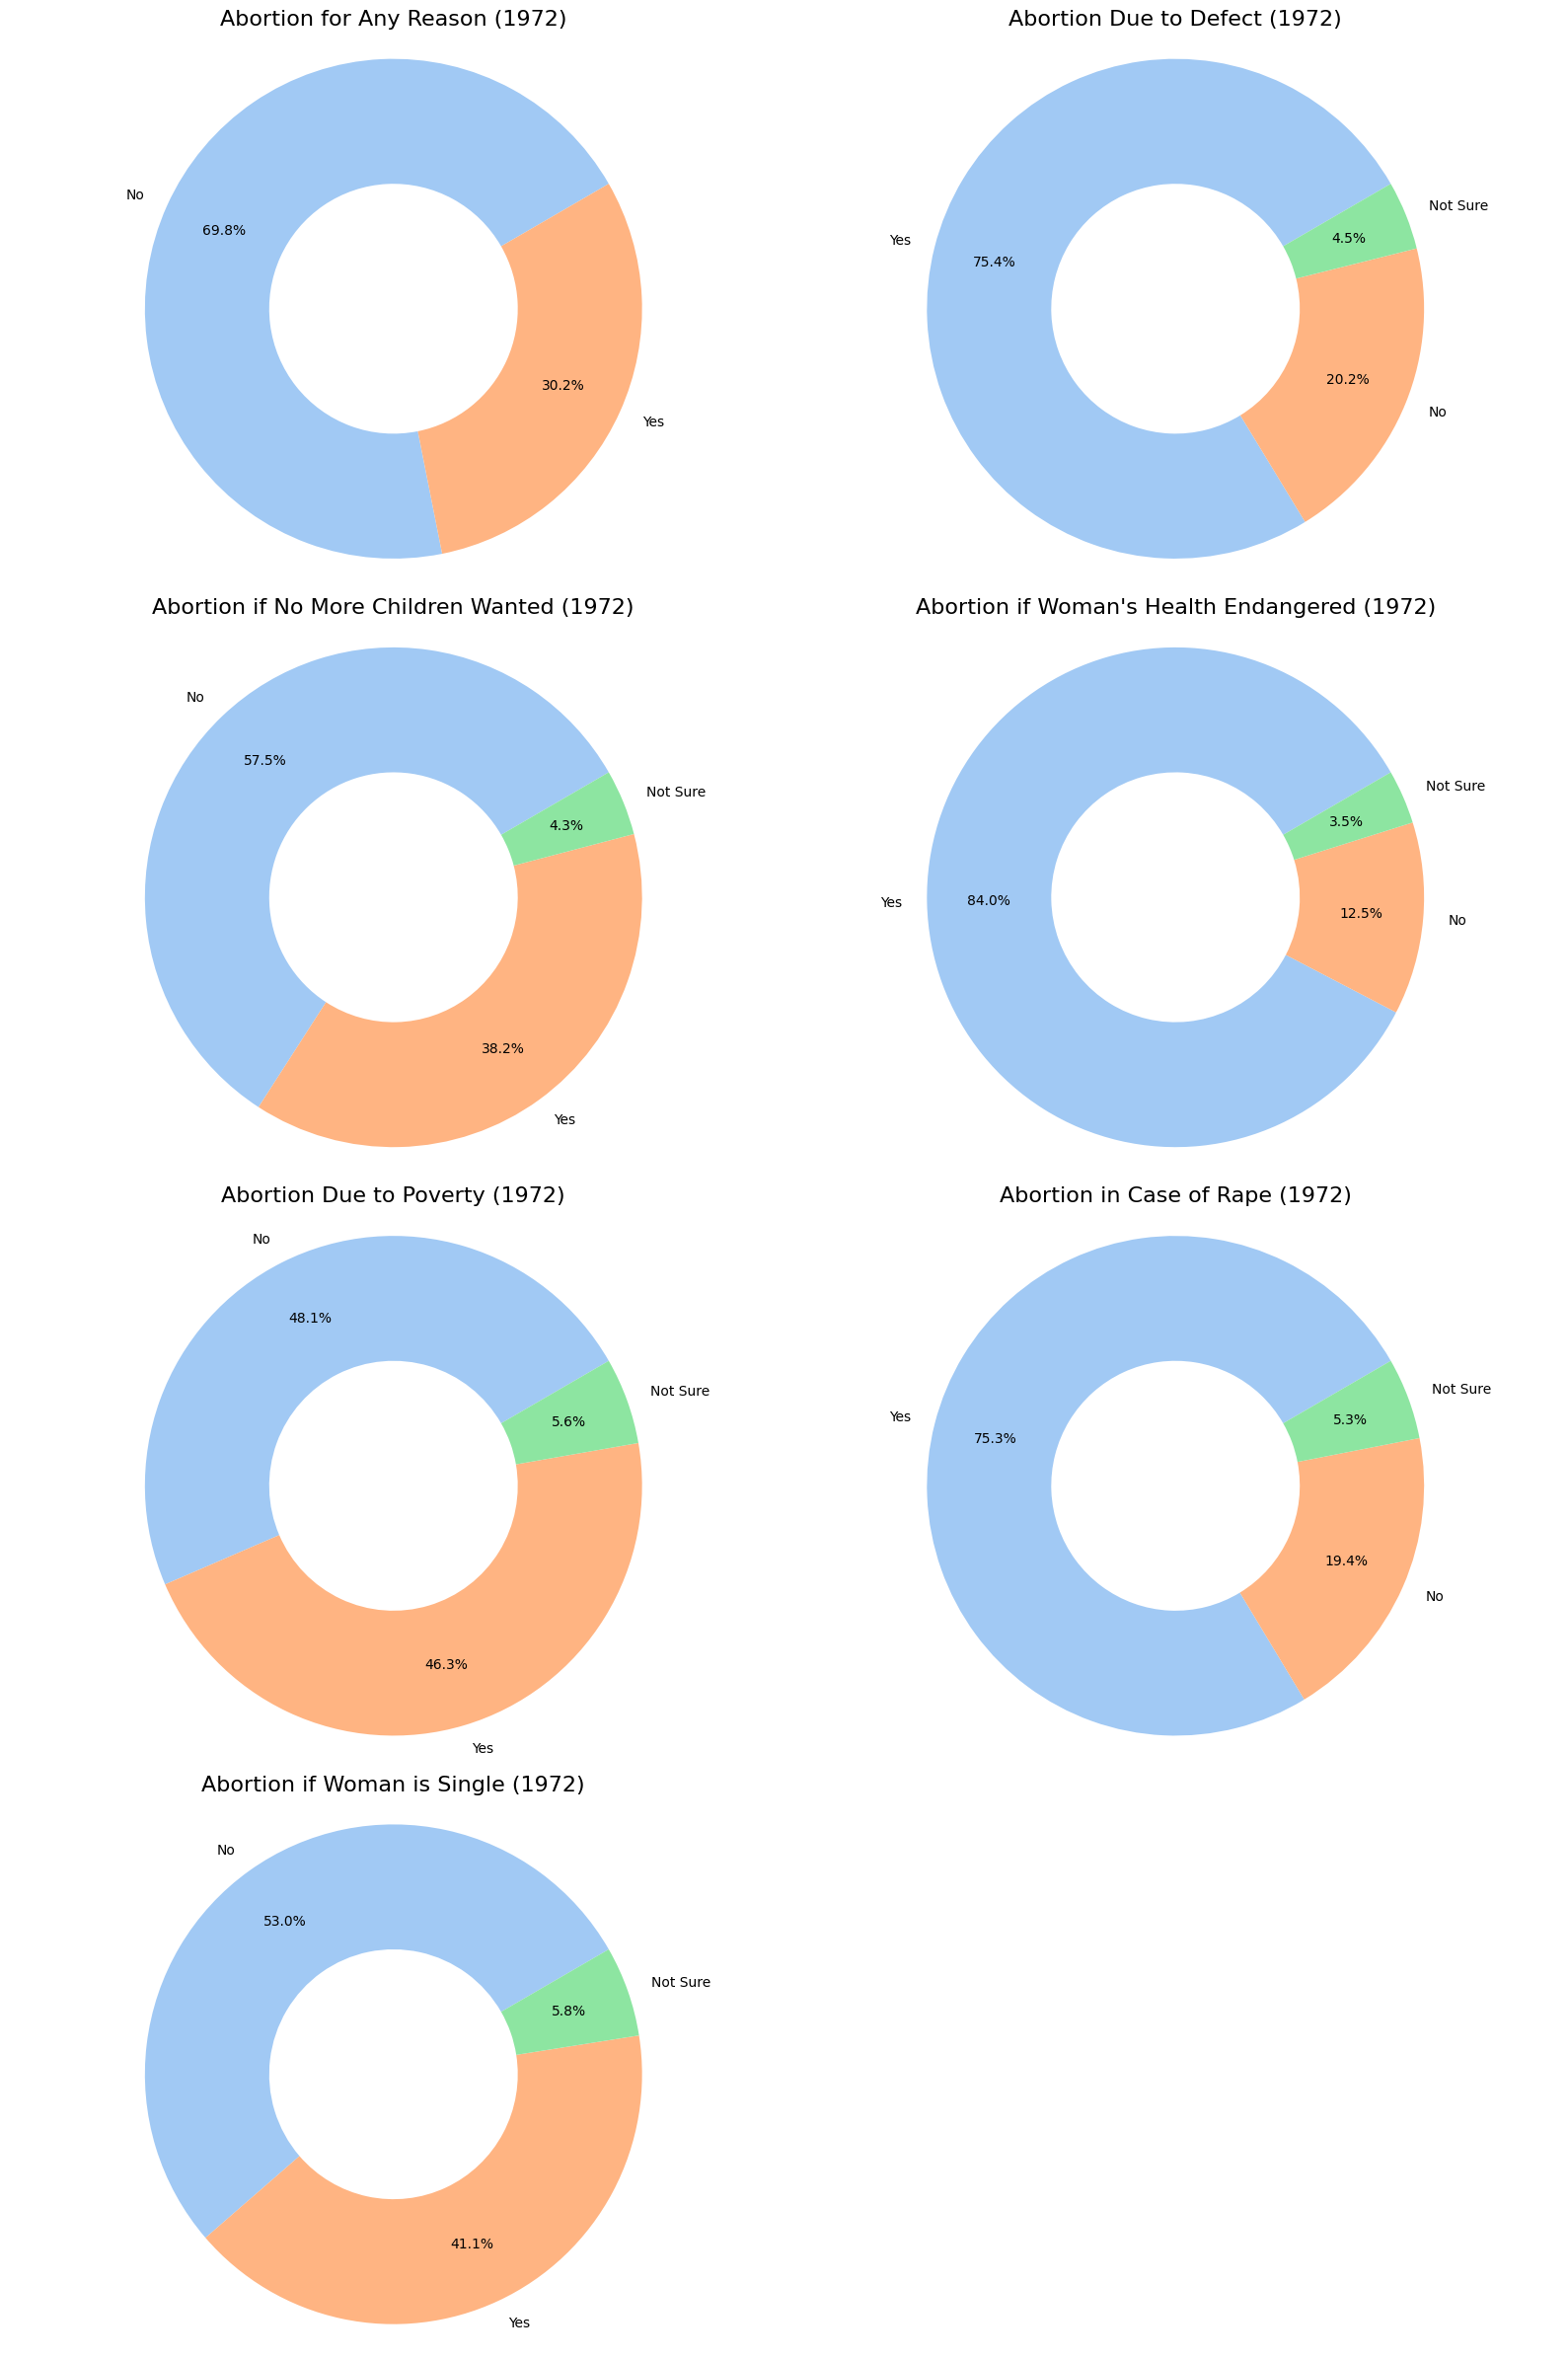

In [38]:
# Function to plot abortion opinion subplots using the given column titles
def plot_abortion_opinion_subplots(data, year, column_titles, colors):
    # Number of rows and columns for the subplot grid
    n_rows = len(column_titles) // 2 + len(column_titles) % 2
    n_cols = 2

    # Creating the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
    axes = axes.flatten()

    # Plotting each donut chart for the given columns
    for i, (column, title) in enumerate(column_titles.items()):
        # Filtering data for the given year
        year_data = data[data['year'] == year]

        # Applying the mapping to the given column
        year_data[column] = year_data[column].map(ab_op)

        # Counting the frequency of each opinion
        opinion_counts = year_data[column].value_counts(normalize=True) * 100

        # Plotting the donut chart with the specified properties
        axes[i].pie(opinion_counts,
                    labels=opinion_counts.index,
                    startangle=30,
                    wedgeprops=dict(width=.5),  # For donuts
                    colors=colors,
                    autopct='%1.1f%%',
                    pctdistance=0.75,  # Adding percentage
                    textprops={'color': 'black'})
        axes[i].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

        # Setting the title using the descriptive title from the dictionary
        axes[i].set_title(f"{title} ({year})", fontsize=16, color='black')

    # Removing any unused subplots
    for i in range(len(column_titles), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Plotting the abortion opinion subplots for the year 1972 using the given column titles
plot_abortion_opinion_subplots(opinion_people_1972, 1972, column_titles, colors_pastel)
